# Quality Report - FORCE Met Tower dataset

## Correctly loading in the CSV file data columns
Loading into a pandas dataframe first required manually setting each of the datatypes so pandas wouldn't guess the type.


In [74]:
import pandas as pd
import datetime as dt
import netCDF4 as nc
import matplotlib
from datetime import datetime
from erddapy import ERDDAP

# Forcing strict datatypes to be assigned to each column in the dataframe
types = {'StationID':int, 'time':str, 'longitude':float, 'latitude':float, 'battery_voltage':float,
       'air_temperature':float, 'solar_irradiance':float, 'relative_humidity':float, 'Manual_BP':int,
       'wind_speed':float, 'air_potential_temperature':float, 'wind_speed_15min_max':float, 'Prog_Sig':int,
       'air_pressure':float, 'solar_irradiance_raw':float,
       'wind_speed_2min_max':float, 'air_pressure_raw':float, 'Rain_mm':float,
       'wind_from_direction_15min_average':float, 'air_temperature_1min_max':float,
       'wind_from_direction':float, 'wind_speed_15min_median':float,
       'wind_speed_15min_average':float}

# Assigning column names
column_names = ['StationID', 'time', 'longitude', 'latitude', 'battery_voltage',
       'air_temperature', 'solar_irradiance', 'relative_humidity', 'Manual_BP',
       'wind_speed', 'air_potential_temperature', 'wind_speed_15min_max',
       'Prog_Sig', 'air_pressure', 'solar_irradiance_raw',
       'wind_speed_2min_max', 'air_pressure_raw', 'Rain_mm',
       'wind_from_direction_15min_average', 'air_temperature_1min_max',
       'wind_from_direction', 'wind_speed_15min_median',
       'wind_speed_15min_average', 'Elevation_Correction', 'elevation']

### Loading dataset from ERDDAP into pandas

#### Note on pattern datatypes:
```int, string, float, float, float, float, float, float, int, float, float, float, int, float, float, float, float, int, float, float, float, float, float, float, float```

In [75]:
# Creating the erddapy object and downloading a fresh CSV file from ERDDAP into a dataframe
e = ERDDAP(server="https://cioosatlantic.ca/erddap",)
e.protocol = "tabledap"
e.dataset_id = "force_meteorological_tower"
e.response = "csv"

url = e.get_download_url()
df_csv = pd.read_csv(url, dtype=types, header=0, skiprows=2, names=column_names)

### Confirming data types are correct.

In [76]:
# This step is needed in confirming the datatypes and properly loading data into the pandas dataframe.
# df_csv.dtypes

### Inspecting the top few rows of data
Looking at the beginning of the data we can see they are updating roughly every 15 minutes. This is important info as we describe the values later in the notebook.

In [77]:
df_csv.head(5)

,StationID,time,longitude,latitude,battery_voltage,air_temperature,solar_irradiance,relative_humidity,Manual_BP,wind_speed,...,wind_speed_2min_max,air_pressure_raw,Rain_mm,wind_from_direction_15min_average,air_temperature_1min_max,wind_from_direction,wind_speed_15min_median,wind_speed_15min_average,Elevation_Correction,elevation
0,1156,2016-12-09T14:19:23Z,-64.403,45.3713,13.24182,-0.990490,0.104737,74.01630,0,3.8416,...,4.900,1000.1650,0.0,NaN,-0.990,282.2419,NaN,NaN,1.80078,25.0
1,1156,2016-12-09T14:34:23Z,-64.403,45.3713,13.24734,-1.024410,0.271738,70.96338,0,6.2132,...,6.390,1000.1650,0.0,NaN,-0.990,305.6517,NaN,NaN,1.80078,25.0
2,1156,2016-12-09T14:49:23Z,-64.403,45.3713,13.23076,-0.854805,0.195477,68.82634,0,3.4496,...,10.190,1000.1650,0.0,NaN,-0.685,319.5723,NaN,NaN,1.80078,25.0
3,1156,2016-12-09T15:04:23Z,-64.403,45.3713,13.21419,-0.617355,0.218138,69.40301,0,7.3892,...,9.330,999.9866,0.0,NaN,-0.448,300.2328,NaN,NaN,1.80078,25.0
4,1156,2016-12-09T15:19:23Z,-64.403,45.3713,13.21419,-0.922649,0.142361,70.01358,0,7.2324,...,6.468,999.9866,0.0,NaN,-0.719,303.0988,NaN,NaN,1.80078,25.0


### Inspecting the statistics of each column
This includes a raw count of how many rows of data are present, and the typical min/max/median/mean shape of the data.

In [78]:
df_csv.describe()

,StationID,longitude,latitude,battery_voltage,air_temperature,solar_irradiance,relative_humidity,Manual_BP,wind_speed,air_potential_temperature,...,wind_speed_2min_max,air_pressure_raw,Rain_mm,wind_from_direction_15min_average,air_temperature_1min_max,wind_from_direction,wind_speed_15min_median,wind_speed_15min_average,Elevation_Correction,elevation
count,190197.0,1.901970e+05,1.901970e+05,190197.000000,190197.000000,190197.000000,190197.000000,190197.0,190197.000000,190197.000000,...,190197.000000,190197.000000,190197.0,152181.000000,190197.000000,190197.000000,152181.000000,152133.000000,1.901970e+05,190197.0
mean,1156.0,-6.440300e+01,4.537130e+01,13.178789,7.060908,0.153825,78.379259,0.0,3.387477,9.940602,...,4.468401,1012.297854,0.0,169.989389,7.149059,173.969477,3.197546,3.217415,1.800780e+00,25.0
std,0.0,2.340676e-10,3.819177e-11,0.292374,8.875845,0.256318,15.296988,0.0,3.149670,9.752490,...,3.675805,9.594908,0.0,105.807041,8.880841,105.911749,3.022551,3.000631,5.075065e-12,0.0
min,1156.0,-6.440300e+01,4.537130e+01,11.698810,-21.369210,-0.000484,17.123540,0.0,0.000000,-22.095700,...,0.000000,957.919400,0.0,0.003483,-21.370000,-0.048266,0.000000,0.000000,1.800780e+00,25.0
25%,1156.0,-6.440300e+01,4.537130e+01,12.932860,0.481869,0.000000,68.026900,0.0,1.097600,2.758320,...,1.803000,1006.821000,0.0,85.054793,0.570000,85.503500,0.960400,0.999600,1.800780e+00,25.0
50%,1156.0,-6.440300e+01,4.537130e+01,13.152800,7.420090,0.004346,81.010500,0.0,2.646000,10.042150,...,3.724000,1012.850000,0.0,140.669920,7.509000,148.712000,2.528400,2.557162,1.800780e+00,25.0
75%,1156.0,-6.440300e+01,4.537130e+01,13.360570,14.539240,0.202643,91.459420,0.0,4.723600,17.488640,...,6.233000,1018.740000,0.0,280.524598,14.620000,281.137000,4.449200,4.464741,1.800780e+00,25.0
max,1156.0,-6.440300e+01,4.537130e+01,14.307720,30.013530,1.444560,100.273700,0.0,28.616000,36.238160,...,29.420000,1041.435000,0.0,359.995133,30.190000,354.620900,24.970400,24.834256,1.800780e+00,25.0


### Assess the data for missing values
Check the presence of air temperature (degree Celsius) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.

<AxesSubplot:xlabel='time'>

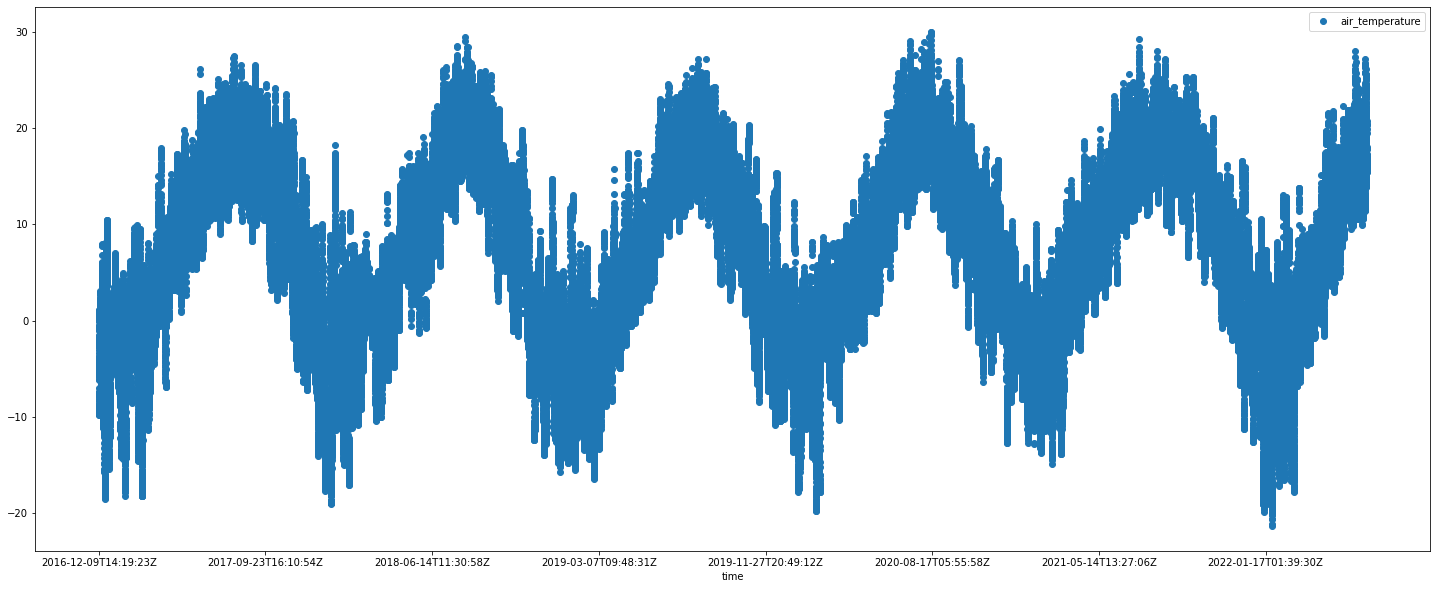

In [79]:
df_csv.plot(x='time', y='air_temperature', linestyle='', marker='o', figsize=(25,10))

### Assess the data for missing values
Check the presence of wind speed (m/s) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.
Note: the missing roughly 6-month period when the wind speed anemometer was down.

<AxesSubplot:title={'center':'Wind Speed'}, xlabel='time', ylabel='m/s'>

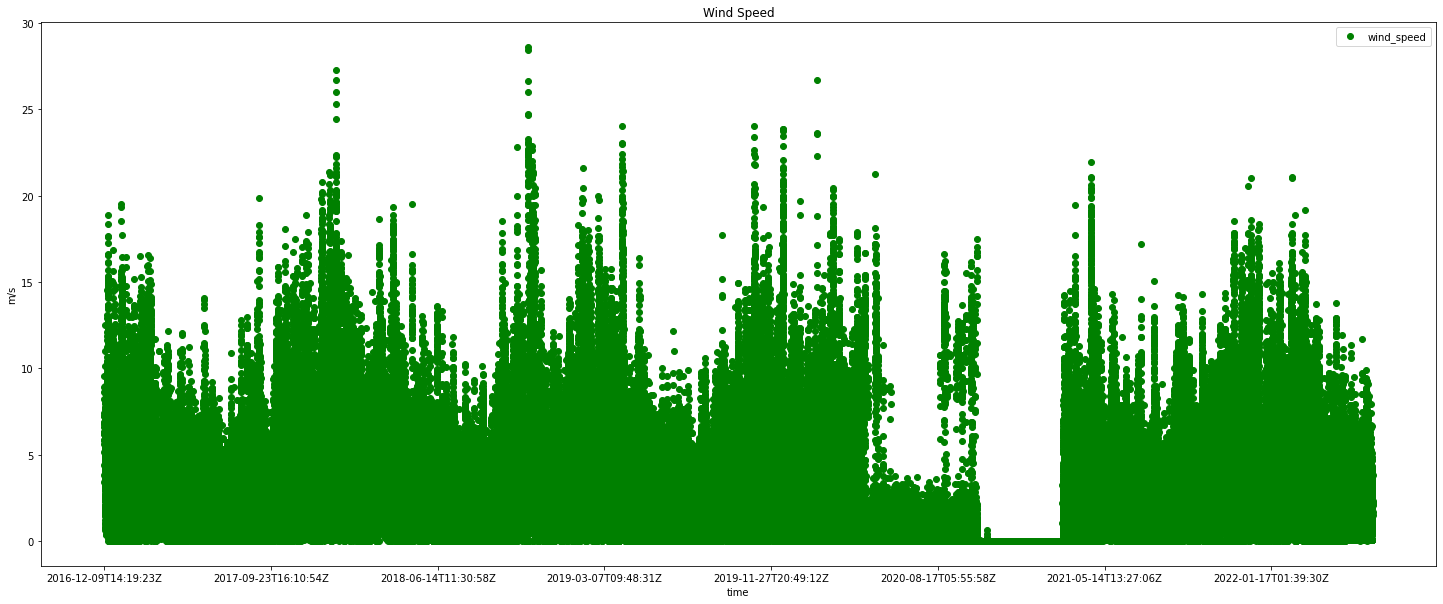

In [80]:
df_csv.plot(x='time', y='wind_speed', ylabel='m/s', title='Wind Speed', linestyle='', color='green', marker='o', figsize=(25,10))

Highlighting the presence of wind speed (m/s) on the y-axis, over time from 2020 August to 2021 April with 15 minute datapoints.

<AxesSubplot:title={'center':'Wind Speed 2021 missing data months but JSON files are still present'}, xlabel='time', ylabel='m/s'>

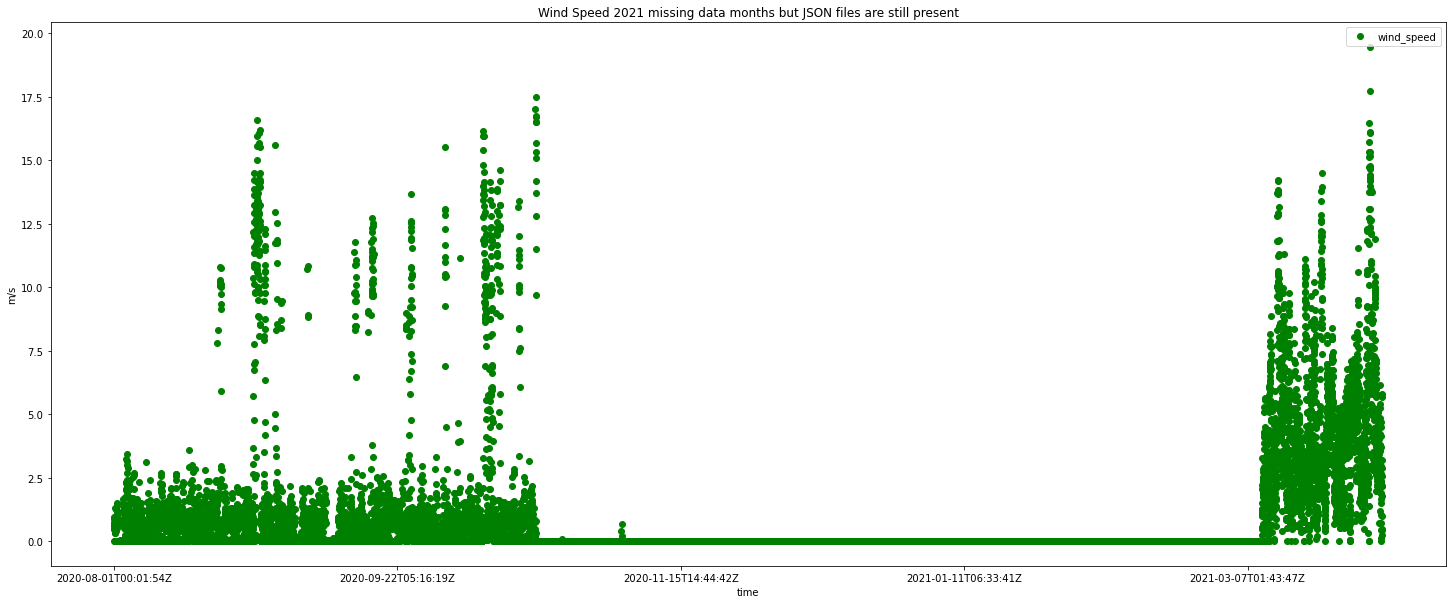

In [81]:
df_csv[(df_csv['time']>="2020-08") & (df_csv['time']<="2021-04")].plot(x='time', y='wind_speed', ylabel='m/s', title='Wind Speed 2021 missing data months but JSON files are still present', linestyle='', color='green', marker='o', figsize=(25,10))

Note that there isn't an obvious visual gap here at first glance, and that is because there were no JSON files, meaning the datapoints are completely missing along with their timestamps. If the data had been empty and still had a JSON it would display here in Jupyter notebooks as a missing chunk.

<AxesSubplot:title={'center':'Air Temperature April 2022 Missing JSON files'}, xlabel='time', ylabel='degree Celsius'>

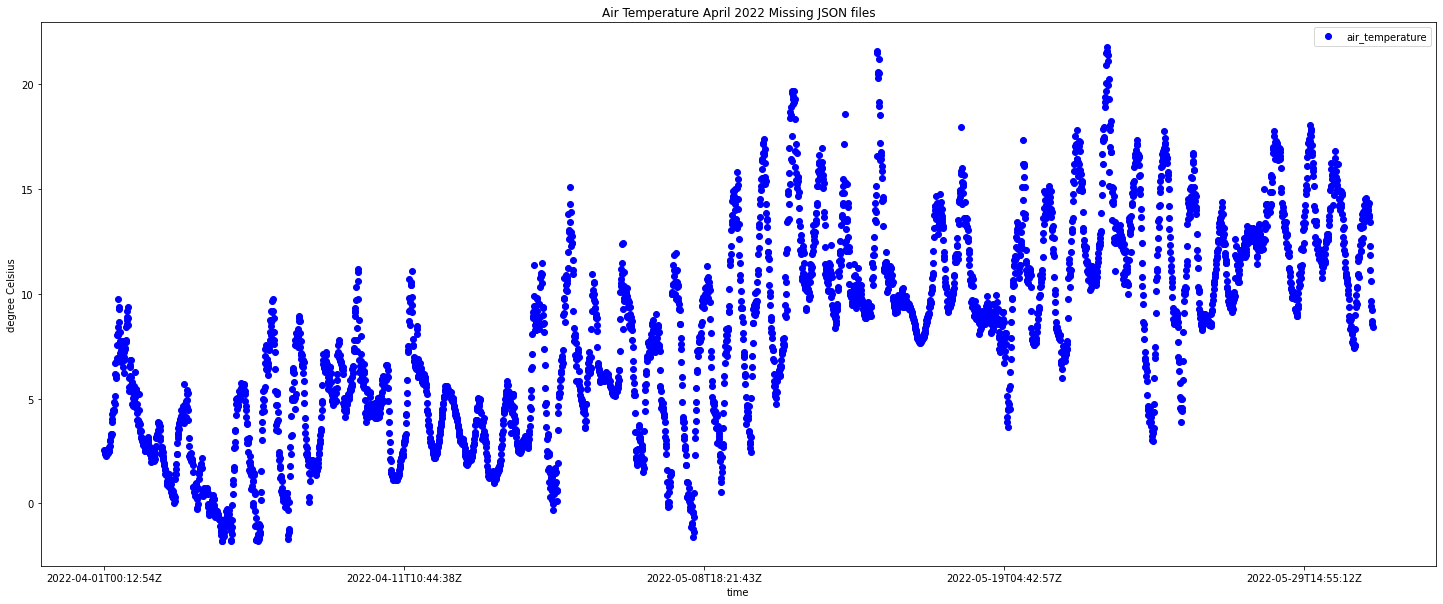

In [82]:
df_csv[(df_csv['time']>="2022-04") & (df_csv['time']<="2022-06")].plot(x='time', y='air_temperature', ylabel='degree Celsius', title='Air Temperature April 2022 Missing JSON files', linestyle='', color='blue', marker='o', figsize=(25,10))

Check the presence of solar irradiance (MJ) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.

<AxesSubplot:title={'center':'solar irradiance'}, xlabel='time', ylabel='MJ/m^2'>

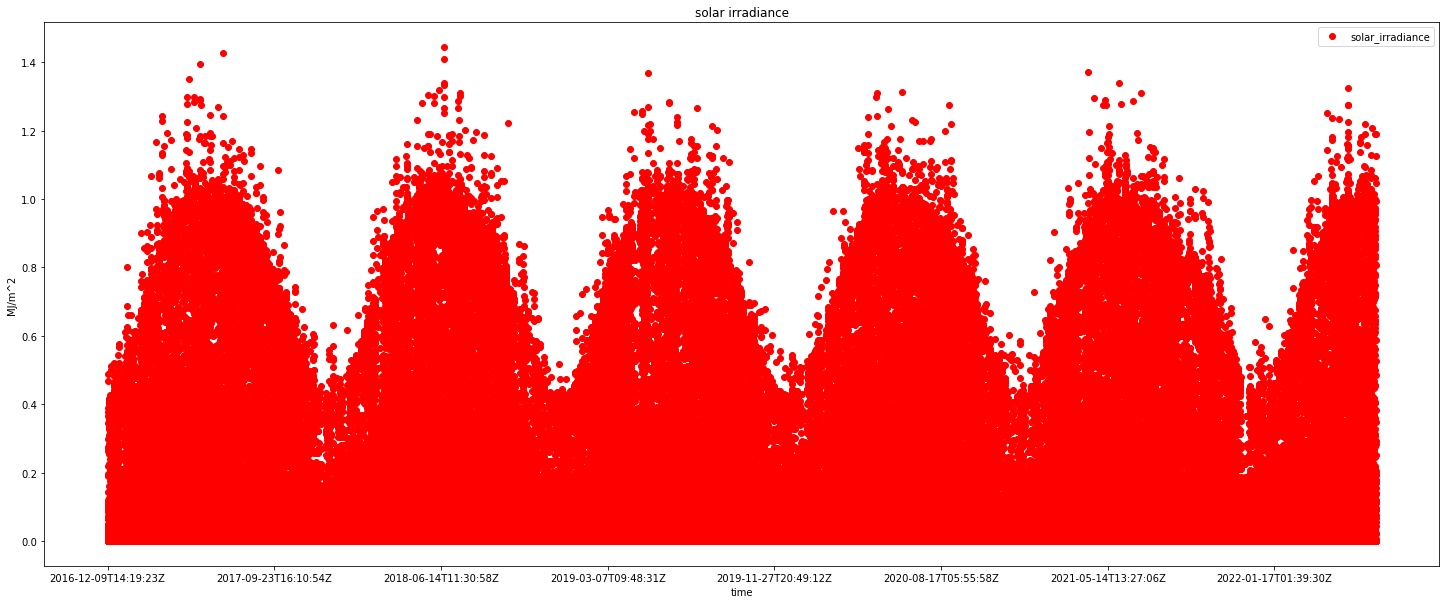

In [83]:
df_csv.plot(x='time', y='solar_irradiance', ylabel='MJ/m^2', title='solar irradiance', linestyle='', color='red', marker='o', figsize=(25,10))

# Missing data JSONs in April ERDDAP plot
![FORCE missing data](./images/force_meteorological_tower_missingJSONs.png)

### Next we automatically check the data for any missing days
This prepares the start and end dates for the next step

In [84]:
df = df_csv['time']
df_time = pd.to_datetime(df)

def date_time_str(time):
    # Needed for rounding day to beginning of month to avoid duplicate appending by mistake
    # time is str and in format of yyyy-mm-dd
    return datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S%z').strftime('%Y-%m-%d')

df_time = df_time.map(lambda x: date_time_str(x))

# Update start and end date of dataset
start_date = str(df_time.iloc[0])
end_date = str(df_time.iloc[-1])

Print the missing JSON dates

In [85]:
print(pd.date_range(start=start_date, end=end_date).difference(df_time))

DatetimeIndex(['2016-12-11', '2016-12-14', '2016-12-15', '2016-12-16',
               '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30', '2016-12-31', '2017-12-05',
               '2019-09-08', '2019-09-09', '2019-09-10', '2019-09-11',
               '2020-11-08', '2020-11-25', '2022-04-12', '2022-04-14',
               '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18',
               '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
               '2022-04-23', '2022-04-24', '2022-04-27'],
              dtype='datetime64[ns]', freq=None)


Count the number of missing dates (these dates return a HTTP 404 error)

In [86]:
days = len(pd.date_range(start=start_date, end=end_date).difference(df_time))
print(f'Number of missing dates: {days}')

Number of missing dates: 39


### Check the solar irradiance units are correct
Originally there were three solar irradiance related columns, marked as kW, MJ, and raw. We interpreted this to be equivalent to kW/m2, MJ/m2 as the canonical units/format for irradiance data. To double check that the columns we used were correctly interpreted we double checked with the federal government solar irradiance database/map for the FORCE location, i.e. what is the daily and annual expected solar irradiance for this general location.

In [87]:
df_solar = df_csv.loc[:,('time','solar_irradiance')]
df_solar['time'] = df_solar['time'].astype('datetime64')
df_solar.head()

,time,solar_irradiance
0,2016-12-09 14:19:23,0.104737
1,2016-12-09 14:34:23,0.271738
2,2016-12-09 14:49:23,0.195477
3,2016-12-09 15:04:23,0.218138
4,2016-12-09 15:19:23,0.142361


Rebinning to monthly solar irradiance to compare expected monthly values.
Keep in mind that these are instantaneous measurements but generally measured over an hour, so we have to multiply by 1/4 to be able to compare to the standard measures used by the community.

In [88]:
df_solar.groupby([(df_solar.time.dt.year), (df_solar.time.dt.month)])['solar_irradiance'].sum()*0.25

time  time
2016  12        1.484640
2017  1        39.583192
      2        66.124920
      3        99.688894
      4       133.289048
                 ...    
2022  3        93.067818
      4        50.998859
      5       186.308268
      6       175.686527
      7        89.351870
Name: solar_irradiance, Length: 68, dtype: float64

Rebinning to daily solar irradiance to compare expected daily values.

In [89]:
solar_day = df_solar.groupby([(df_solar.time.dt.year), (df_solar.time.dt.month), (df_solar.time.dt.day)])['solar_irradiance'].sum()*0.25
print(solar_day)

time  time  time
2016  12    9       1.251317
            10      0.118633
            12      0.114689
            13      0.000000
2017  1     1       0.010370
                      ...   
2022  7     11      8.061340
            12      7.494458
            13      6.185863
            14      7.125231
            15      2.728972
Name: solar_irradiance, Length: 2006, dtype: float64


In [91]:
solar_day.to_csv("./output/example_solar_day.csv")

What we are looking for here is whether the mean value of solar irradiance matches the government data range of 12-15 MJ/m2 which is the medium green colour which says 800-900 kWh/kW in the top column of the legend (see both map and legend below)

In [92]:
solar_day.describe()*4

count    8024.000000
mean       14.584804
std        10.273195
min        -0.000965
25%         5.789547
50%        12.372447
75%        23.020121
max        49.782026
Name: solar_irradiance, dtype: float64

### Comparing FORCE data with expected range of values
The following is an interactive Photovoltaic Potential and Solar Resource Map of Canada from the Federal government. It shows how many KWh/kW, MJ/m2 are to be expected either annually averaged or on a monthly basis. See the colour legend for what is expected on average for the FORCE Met Tower in the location near Parrsboro, Nova Scotia.
[https://fgp-pgf.maps.arcgis.com/apps/webappviewer/index.html?id=c91106a7d8c446a19dd1909fd93645d3](https://fgp-pgf.maps.arcgis.com/apps/webappviewer/index.html?id=c91106a7d8c446a19dd1909fd93645d3)

### FORCE expected solar irradiance daily insolation
![FORCE expected solar irradiance](./images/force_solarsite.png)

### Solar irradiance legend (from solar map)
![Government map solar irradiance legend](./images/solar_irradiance_legend.png)

These annual values match up with the summations in the daily values as well, and are in the expected range for annual MJ/m2 (keep in mind that is not kWh/kW another common way to represent a solar resource)

In [93]:
df_solar.groupby(df_solar.time.dt.year)['solar_irradiance'].sum()*0.25

time
2016       1.484640
2017    1314.129474
2018    1313.158639
2019    1311.588985
2020    1322.543992
2021    1367.614493
2022     683.759201
Name: solar_irradiance, dtype: float64

<AxesSubplot:ylabel='Frequency'>

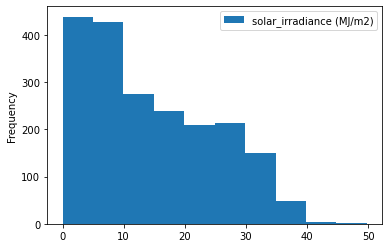

In [95]:
solar_day_hourly = solar_day*4
solar_day_hourly.plot.hist(bins=10, legend=True, label='solar_irradiance (MJ/m2)')

### Conclusion:
The data quality is looking in good shape.

### Note:
We aim to run the qartod qc library on this dataset next to check for any out of range values, such as high wind speeds (outliers), and missing data that has either a datetime, or missing a single 15-minute time chunk.